CNN으로 패션아이템 구분하기 2022년 1월 8일 김이룸

In [ ]:
# 1번 셀

# 패키지 수입
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils import np_utils

from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.layers import InputLayer
from keras.layers import Dense

In [ ]:
# 2번 셀

# 하이퍼파라미터
MY_EPOCH = 10       # 반복학습 수
MY_BATCH = 500      # 매번 가져와서 계산하는 학습용 데이터 수 : 배달 한번에 들고가는 데이터 수

# MY_HIIDEN : 은닉층 뉴런 수

4431872/4422102 [==============================] - 0s 0us/step
학습용 입력 데이터 모양: (60000, 28, 28)
학습용 출력 데이터 모양: (60000,)
평가용 입력 데이터 모양: (10000, 28, 28)
평가용 출력 데이터 모양: (10000,)
(28, 28)
<class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109 

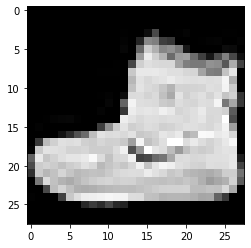

In [ ]:
# 3번 셀

# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

def print_data_shape(X_train, Y_train, X_test, Y_test):
  print('학습용 입력 데이터 모양:', X_train.shape)
  print('학습용 출력 데이터 모양:', Y_train.shape)
  print('평가용 입력 데이터 모양:', X_test.shape)
  print('평가용 출력 데이터 모양:', Y_test.shape)

print_data_shape(X_train, Y_train, X_test, Y_test)

# 수치 데이터는 8-bit 화소 정수 [0,255]


print(X_train[0].shape)
print(type(X_train[0]))
print(X_train[0])
plt.imshow(X_train[0], cmap='gray')
print('0번 학습용 입력 이미지  라벨 : ', Y_train[0])


def print_shape_and_head(x):
  print(x.shape)
  print(x.head())
# print_shape_and_head(data) # 이미지 데이터라 shape와 head 확인이 의미없다.



In [ ]:
# 4번 셀

# 입력 데이터 추가 처리
# 화소 데이터 [0,1] 스케일링
X_train = X_train / 255
X_test = X_test / 255 

# 이미지 채널 정보 추가
# keras.convolution (합성곱) 함수가 4차원 입력 요구해서
print('before : ', X_train.shape)
X_train = np.expand_dims(X_train, axis=3) # axis=4는 out of bound for array 4 에러남
print('after : ', X_train.shape)

print('before : ', X_test.shape)
X_test = np.expand_dims(X_test, axis=3)
print('after : ', X_test.shape)


before :  (60000, 28, 28)
after :  (60000, 28, 28, 1)
before :  (10000, 28, 28)
after :  (10000, 28, 28, 1)


In [ ]:
# 5번 셀

# 출력 데이터 추가 처리 : 원핫인코딩
print('전 : ', Y_train[0])
Y_train = np_utils.to_categorical(Y_train, 10)
print('후 : ', Y_train[0])
Y_test = np_utils.to_categorical(Y_test, 10)

전 :  9
후 :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
# 6번 셀

# 최종 데이터 모양 확인
print_data_shape(X_train, Y_train, X_test, Y_test)

학습용 입력 데이터 모양: (60000, 28, 28, 1)
학습용 출력 데이터 모양: (60000, 10)
평가용 입력 데이터 모양: (10000, 28, 28, 1)
평가용 출력 데이터 모양: (10000, 10)


합성곱 안에 핵심 원천기술 : (conv, relu, pooling) 세트를 '반복'적으로 학습한다.

pooling하면 해상도가 뚝 떨어진다. 사람 눈으로 분간 안된다.

세계 최초의 딥러닝 위한 공유데이터 : mnist

In [ ]:
# 7번 셀

# 인공 신경망 구현 : CNN
model = Sequential()
model.add(InputLayer(input_shape=(28,28,1))) # 28x28 흑백이미지 입력

# 첫번째 합성곱 블럭(컨볼루션,풀링) 추가
# 컨볼루션 : 특징 추출
# 풀링 : 버리기
# filters : 사용할 필터개수 -> 이미지 1개를 필터 32개 적용해서 이미지를 32개로 늘림. subsampling?
# kernel : 필터
# kernel_size : 필터사이즈 
# padding = 'same' : 28by28 이미지에 0으로 테두리를 추가 -> 30by30
# pool_size : 28by28 이미지를 pool_size=2로 pooling하면 채널수는 변하지 않고 화소수만 28/poolsize by 28/poolsize, 즉 28/2by28by2 = 14by14로 화소수가 '뚝' 떨어진다.
model.add(Conv2D(filters=32,
                 kernel_size=2,
                 padding='same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=2))

# 두번째 합성곱 블럭 추가
model.add(Conv2D(filters=64,
                 kernel_size=2,
                 padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=2))

# 화소를 뉴런으로 전환 : DNN 연결 위해
model.add(Flatten())

# 첫번째 은닉층
model.add(Dense(units=128,
                activation='relu'))

# 출력층
# softmax : 주어진 이미지의 라벨이 0-9 중 하나일 확률, 10개 합은 1
model.add(Dense(units=10,
                activation='softmax'))

# CNN 요약 : 28*28=784 에서 10개로 축소하는 과정
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [ ]:
# 8번 셀 

# CNN 학습
# 1. 학습 환경 설정
# optimizer : 
# categoricla_crossentropy : 정답이 원핫 인코딩되어있을 때  예측값을 확률로 반환하는 손실함수.
# metrics = ['acc'] : 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

# 2. 반복 학습 진행
# 관찰 : 손실값(loss)가 내려간다. 정확도(acc)가 올라간다.
print('학습시작')
begin = time()

model.fit(X_train,
          Y_train,
          epochs=MY_EPOCH,
          batch_size=MY_BATCH,
          verbose=1)

end = time()
print('총 학습 시간 : ', end - begin)

학습시작
Epoch 1/10
120/120 [==============================] - 12s 24ms/step - loss: 0.6866 - acc: 0.7584
Epoch 2/10
120/120 [==============================] - 3s 23ms/step - loss: 0.3986 - acc: 0.8581
Epoch 3/10
120/120 [==============================] - 3s 23ms/step - loss: 0.3479 - acc: 0.8772
Epoch 4/10
120/120 [==============================] - 3s 23ms/step - loss: 0.3237 - acc: 0.8842
Epoch 5/10
120/120 [==============================] - 3s 23ms/step - loss: 0.2986 - acc: 0.8923
Epoch 6/10
120/120 [==============================] - 3s 23ms/step - loss: 0.2830 - acc: 0.8991
Epoch 7/10
120/120 [==============================] - 3s 23ms/step - loss: 0.2730 - acc: 0.9021
Epoch 8/10
120/120 [==============================] - 3s 23ms/step - loss: 0.2588 - acc: 0.9065
Epoch 9/10
120/120 [==============================] - 3s 23ms/step - loss: 0.2533 - acc: 0.9089
Epoch 10/10
120/120 [==============================] - 3s 23ms/step - loss: 0.2372 - acc: 0.9148
총 학습 시간 :  37.45457124710083


In [ ]:
# 9번 셀

# CNN 평가
score = model.evaluate(X_test,
                      Y_test)

print('최종 정확도 : ',score[1]) # 1만개 중 9천개 맞는다. 여기서 loss는 의미없다.


313/313 [==============================] - 2s 4ms/step - loss: 0.2707 - acc: 0.9016
최종 정확도 :  0.9016000032424927


(28, 28, 1)
(28, 28)
라벨 :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
CNN 예측 :  9


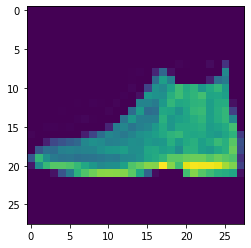

In [ ]:
# 10번 셀

# 샘플 결과 출력
print(X_test[0].shape)

# imshow 함수는 채널 정보를 제거해야 함
# (28,28,1) -> (28,28)
img = X_test[0].squeeze()
print(img.shape)
plt.imshow(img)
print('라벨 : ', Y_test[0])

# CNN 예측
# np.argmax() : 제일 큰게 몇번째에 있는지 알려주는 함수. 원핫인코딩 시 사용.
pred = model.predict(X_test)
print('CNN 예측 : ', np.argmax(pred[0]))